In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize variables
data = []
current_age = None
column_names = None

#filename = "./Isochrones/BHAC15_iso.GAIA.txt"
filename = "BHAC15_iso_UBVRI.txt"

# Read file line by line
with open(filename, "r") as file:
    for line in file:
        line = line.strip()

        # Check for age line
        if line.startswith("!  t (Gyr) ="):
            current_age = float(line.split("=")[-1].strip())  # Extract age value

        # Identify and store column names
        elif line.startswith("! M/Ms"):
            column_names = line.replace("!", "").split()  # Extract column names

        # Identify data lines (ignore lines starting with "!")
        elif not line.startswith("!") and line:
            values = list(map(float, line.split()))
            values.append(current_age)  # Append age to the row
            data.append(values)

# Add age column name
column_names.append("Age")

# Create DataFrame
df = pd.DataFrame(data, columns=column_names)
df['Age'] = np.log10(df['Age']*10**9)
df['Z'] = 0.0152

In [14]:
df

,M/Ms,Teff,L/Ls,g,R/Rs,Li/Li0,Mv,Mr,Mi,Mj,Mh,Mk,Ml,Mll,Mm,Age,Z
0,0.010,2387.0,-2.47,3.38,0.339,1.000,16.87,14.32,11.81,8.77,8.30,7.83,7.44,7.15,7.30,5.69897,0.0152
1,0.015,2514.0,-2.21,3.38,0.413,1.000,15.56,13.26,10.84,8.13,7.67,7.24,6.87,6.61,6.73,5.69897,0.0152
2,0.020,2594.0,-2.05,3.40,0.466,1.000,14.78,12.62,10.26,7.74,7.28,6.87,6.53,6.28,6.38,5.69897,0.0152
3,0.030,2668.0,-1.79,3.36,0.599,1.000,13.80,11.77,9.47,7.08,6.62,6.24,5.92,5.67,5.77,5.69897,0.0152
4,0.040,2733.0,-1.66,3.40,0.661,1.000,13.20,11.28,9.04,6.78,6.30,5.95,5.65,5.41,5.50,5.69897,0.0152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0.500,3689.0,-1.43,4.79,0.471,0.000,9.67,8.81,7.68,6.56,5.97,5.76,5.60,5.52,5.60,10.00000,0.0152
789,0.600,4013.0,-1.12,4.71,0.569,0.000,8.50,7.73,6.88,5.90,5.26,5.11,5.00,4.96,5.07,10.00000,0.0152
790,0.700,4493.0,-0.79,4.64,0.662,0.000,7.29,6.59,6.04,5.22,4.63,4.54,4.49,4.48,4.58,10.00000,0.0152
791,0.800,5002.0,-0.47,4.56,0.776,0.000,6.18,5.64,5.21,4.56,4.12,4.05,4.01,4.00,4.08,10.00000,0.0152


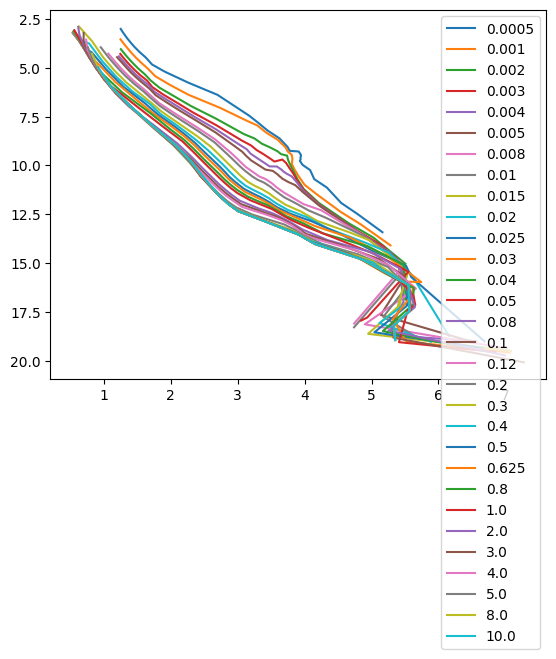

In [10]:
for age in df.Age.unique()[:10]:
    sub_df = df[df.Age == age]
    plt.plot((sub_df.G_BP - sub_df.G_RP).values, sub_df.G.values, label = age)

plt.gca().invert_yaxis()
plt.legend()
plt.show()

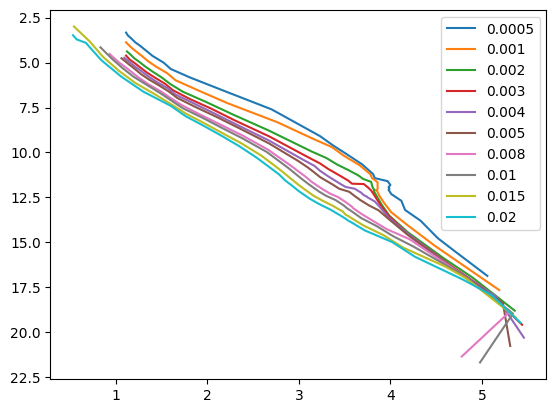

In [7]:
for age in df.Age.unique()[:10]:
    sub_df = df[df.Age == age]
    plt.plot((sub_df.Mv - sub_df.Mi).values, sub_df.Mv.values, label = age)

plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [17]:
df.to_csv("BHAC15_iso_UBVRI.txt", index=False, sep = ' ')

In [4]:
import pandas as pd

a = pd.read_csv("BHAC15_iso_UBVRI.txt", comment="#", sep='\s+')
a.columns = ["M/Ms", "Teff", "L/Ls", "g", "R/Rs", "Li/Li0", "Mv", "Mr", "Mi", "Mj", "Mh", "Mk", "Ml", "Mll", "Mm", "Age", "Z"]

In [7]:
a.sort_values(by=["Mv"], ascending=True)

,M/Ms,Teff,L/Ls,g,R/Rs,Li/Li0,Mv,Mr,Mi,Mj,Mh,Mk,Ml,Mll,Mm,Age,Z
267,1.40,6422.0,0.70,4.07,1.804,0.938,2.99,2.70,2.45,2.13,1.93,1.90,1.89,1.89,1.89,0.015,0.0152
691,1.40,6464.0,0.68,4.10,1.751,0.938,3.02,2.74,2.49,2.18,1.98,1.95,1.95,1.94,1.94,2.000,0.0152
668,1.40,6684.0,0.62,4.22,1.521,0.938,3.17,2.91,2.69,2.42,2.24,2.22,2.21,2.21,2.21,1.000,0.0152
644,1.40,6705.0,0.61,4.24,1.491,0.938,3.20,2.95,2.73,2.45,2.28,2.26,2.25,2.25,2.25,0.800,0.0152
620,1.40,6727.0,0.59,4.25,1.462,0.938,3.23,2.98,2.76,2.49,2.32,2.30,2.29,2.29,2.29,0.625,0.0152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.06,1584.0,-4.30,5.27,0.094,0.000,23.41,19.73,17.48,14.19,12.99,12.07,11.12,10.77,11.35,1.000,0.0152
714,0.07,1631.0,-4.29,5.38,0.090,0.000,23.42,19.71,17.43,14.08,12.94,12.08,11.17,10.79,11.44,4.000,0.0152
774,0.07,1626.0,-4.30,5.38,0.090,0.000,23.43,19.72,17.44,14.10,12.96,12.09,11.18,10.81,11.43,10.000,0.0152
735,0.07,1627.0,-4.30,5.38,0.090,0.000,23.43,19.72,17.44,14.10,12.96,12.09,11.17,10.81,11.43,5.000,0.0152


In [10]:
import pandas as pd

a = pd.read_csv("./Isochrones/BHAC15_iso.txt", comment="#", sep='\s+')
a.columns = [
    "M/Ms", "Teff", "L/Ls", "g", "R/Rs", "Li/Li0", "F33", "F33B", "F41", "F45B",
    "F47", "F51", "FHa", "F57", "F63B", "F67", "F75", "F78", "F82", "F82B", "F89",
    "G_RSV", "G", "G_BP", "G_RP", "Age", "Z"
]


In [11]:
a.sort_values(by=["G"], ascending=True)

,M/Ms,Teff,L/Ls,g,R/Rs,Li/Li0,F33,F33B,F41,F45B,...,F78,F82,F82B,F89,G_RSV,G,G_BP,G_RP,Age,Z
268,1.40,6422.0,0.70,4.07,1.804,0.938,3.458,3.458,3.586,3.385,...,2.467,2.418,2.451,2.406,2.383,2.886,3.126,2.501,7.176091,0.0152
706,1.40,6464.0,0.68,4.10,1.751,0.938,3.474,3.474,3.607,3.411,...,2.510,2.461,2.494,2.451,2.428,2.922,3.158,2.543,9.301030,0.0152
28,1.40,4647.0,0.74,3.47,3.601,1.000,5.305,5.305,4.786,4.194,...,2.271,2.186,2.226,2.061,2.078,3.018,3.567,2.316,5.698970,0.0152
682,1.40,6684.0,0.62,4.22,1.521,0.938,3.547,3.547,3.695,3.523,...,2.706,2.663,2.693,2.660,2.634,3.084,3.296,2.738,9.000000,0.0152
657,1.40,6705.0,0.61,4.24,1.491,0.938,3.569,3.569,3.719,3.549,...,2.740,2.697,2.727,2.695,2.669,3.116,3.325,2.772,8.903090,0.0152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,0.03,1320.0,-4.48,4.83,0.110,1.000,28.794,28.794,27.021,25.363,...,20.144,18.155,17.977,16.443,16.995,19.480,24.851,17.765,8.477121,0.0152
658,0.05,1383.0,-4.52,5.18,0.096,0.923,28.709,28.709,26.952,25.265,...,20.119,18.223,18.057,16.540,17.113,19.534,24.678,17.826,9.000000,0.0152
607,0.04,1336.0,-4.53,5.03,0.101,1.000,28.849,28.849,27.090,25.416,...,20.259,18.292,18.088,16.536,17.124,19.569,24.914,17.850,8.795880,0.0152
683,0.06,1379.0,-4.59,5.32,0.089,0.000,28.835,28.835,27.111,25.404,...,20.463,18.571,18.288,16.684,17.367,19.712,24.976,17.979,9.301030,0.0152


In [19]:
import os
import json
import subprocess
import pandas as pd
import multiprocessing as mp

from catalogues import get_catalogue

# Load data
df = get_catalogue(['Dias'])[0]
df = df[(df.r_sun < 1000) & (df.age < 150)]
cluster_names = df["cluster"].unique()

# Merge results
result_files = [f"./junk/results_{name}.csv" for name in cluster_names if os.path.exists(f"./junk/results_{name}.csv")]
if result_files:
    combined_df = pd.concat([pd.read_csv(f) for f in result_files], ignore_index=True)
    combined_df.to_csv("ResultsBaraffeUBVRI_cut.csv", index=False)
print("All clusters processed and results saved to Results.csv!")

All clusters processed and results saved to Results.csv!
